# Анализ представленных данных (EDA)

Химиками были предоставлены данные о 1000 химических соединений с указанием их эффективности против вируса гриппа. Параметры, характеризующие эффективность, обозначены как IC50, CC50 и SI.

SI = CC50 / IC50

Все остальные представленные признаки являются числовыми характеристиками химических соединений.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Иследование и анализ датасета

#### 1. Загрузим датасет

In [ ]:
%%time
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/8 Классическое МО (ML)/Курсовая работа Хим соединения/Данные_для_курсовои_Классическое_МО.xlsx')
df.head(2)

CPU times: user 4.58 s, sys: 24.1 ms, total: 4.61 s
Wall time: 8.17 s


,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,...,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,...,0,0,0,0,0,0,0,0,3,0


#### 2. Выведем форму датасета и статистические показатели по признакам

In [ ]:
print(f"dataset shape: {df.shape}")

dataset shape: (1001, 214)


In [ ]:
df.describe()

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.0,1001.000000,1001.000000,1001.000000
mean,500.000000,222.805156,589.110728,72.508823,10.831637,10.831637,0.180681,-0.967237,0.580412,29.487989,...,0.053946,0.011988,0.008991,0.000999,0.000999,0.051948,0.0,0.069930,0.204795,0.006993
std,289.108111,402.169734,642.867508,684.482739,3.307505,3.307505,0.168710,1.588036,0.212230,12.742749,...,0.259011,0.108886,0.094441,0.031607,0.031607,0.222033,0.0,0.255157,1.215326,0.083373
min,0.000000,0.003517,0.700808,0.011489,2.321942,2.321942,0.000039,-6.992796,0.059567,9.416667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,250.000000,12.515396,99.999036,1.433333,9.252350,9.252350,0.051073,-1.334487,0.442842,18.486486,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,500.000000,46.585183,411.039342,3.846154,12.179236,12.179236,0.124606,-0.419485,0.634981,29.290323,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,750.000000,224.975928,894.089176,16.566667,13.167843,13.167843,0.291020,0.061754,0.742483,38.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,1000.000000,4128.529377,4538.976189,15620.600000,15.933463,15.933463,1.374614,1.374614,0.947265,60.272727,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,20.000000,1.000000


In [ ]:
# выведем названия всех колонок
print(df.columns.tolist())

['Unnamed: 0', 'IC50, mM', 'CC50, mM', 'SI', 'MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8',

#### 3. Выведем информацию о пропусках в данных

In [ ]:
missing_values = df.isnull().sum()  # количество пропусков по каждому признаку
total_rows = len(df)  # общее число строк

# фильтруем только столбцы с пропусками
missing_data = missing_values[missing_values > 0].to_frame(name="Missing Count")
missing_data["Missing Percentage"] = (missing_data["Missing Count"] / total_rows) * 100

missing_data

,Missing Count,Missing Percentage
MaxPartialCharge,3,0.2997
MinPartialCharge,3,0.2997
MaxAbsPartialCharge,3,0.2997
MinAbsPartialCharge,3,0.2997
BCUT2D_MWHI,3,0.2997
BCUT2D_MWLOW,3,0.2997
BCUT2D_CHGHI,3,0.2997
BCUT2D_CHGLO,3,0.2997
BCUT2D_LOGPHI,3,0.2997
BCUT2D_LOGPLOW,3,0.2997


In [ ]:
summary = pd.DataFrame(
    {
        "Missing Count": df.isnull().sum(),
        "Missing Percentage": df.isnull().mean() * 100,
        "Unique Values": df.nunique(),
        "Total Values": df.count(),
    }
)

# добавляем процент уникальных от общего количества непустых значений
summary["Unique Percentage"] = (
    summary["Unique Values"] / summary["Total Values"]
) * 100

# округляем проценты до 2 знаков после запятой
summary["Missing Percentage"] = summary["Missing Percentage"].round(2)
summary["Unique Percentage"] = summary["Unique Percentage"].round(2)

summary

,Missing Count,Missing Percentage,Unique Values,Total Values,Unique Percentage
Unnamed: 0,0,0.0,1001,1001,100.00
"IC50, mM",0,0.0,953,1001,95.20
"CC50, mM",0,0.0,888,1001,88.71
SI,0,0.0,768,1001,76.72
MaxAbsEStateIndex,0,0.0,793,1001,79.22
...,...,...,...,...,...
fr_thiazole,0,0.0,2,1001,0.20
fr_thiocyan,0,0.0,1,1001,0.10
fr_thiophene,0,0.0,2,1001,0.20
fr_unbrch_alkane,0,0.0,13,1001,1.30


In [ ]:
# выведем строки с пропусками
df.loc[df["MaxPartialCharge"].isnull(), "MaxPartialCharge":]

,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
78,NaN,NaN,NaN,NaN,1.470588,2.117647,2.647059,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
79,NaN,NaN,NaN,NaN,1.470588,2.117647,2.647059,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
80,NaN,NaN,NaN,NaN,1.500000,2.187500,2.750000,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# выведем соседние строки со строками с пропусками
df.loc[70:85, "MaxPartialCharge":]

,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
70,0.192890,-0.506612,0.506612,0.192890,1.073171,1.780488,2.487805,16.500199,9.696332,2.552008,...,0,0,0,0,0,0,0,0,0,0
71,0.194116,-0.507053,0.507053,0.194116,1.176471,1.852941,2.500000,16.494030,9.696363,2.557979,...,0,0,0,0,0,0,0,0,0,0
72,0.194116,-0.507053,0.507053,0.194116,1.151515,1.787879,2.363636,16.493425,9.696363,2.557871,...,0,0,0,0,0,0,0,0,0,0
73,0.194116,-0.507053,0.507053,0.194116,1.161290,1.774194,2.322581,16.493423,9.696379,2.557979,...,0,0,0,0,0,0,0,0,0,0
74,0.194116,-0.507053,0.507053,0.194116,1.187500,1.812500,2.375000,16.493425,9.696378,2.558060,...,0,0,0,0,0,0,0,0,0,0
75,0.194116,-0.507053,0.507053,0.194116,1.176471,1.852941,2.500000,16.494030,9.696363,2.557979,...,0,0,0,0,0,0,0,0,0,0
76,0.194116,-0.507053,0.507053,0.194116,1.161290,1.774194,2.322581,16.493423,9.696379,2.557979,...,0,0,0,0,0,0,0,0,0,0
77,0.455184,-0.357600,0.455184,0.357600,1.562500,2.250000,2.812500,32.197151,10.708899,2.200882,...,0,0,0,0,0,0,0,0,0,0
78,NaN,NaN,NaN,NaN,1.470588,2.117647,2.647059,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
79,NaN,NaN,NaN,NaN,1.470588,2.117647,2.647059,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.loc[0:3, "Kappa1":]

,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,20.606247,6.947534,2.868737,173.630124,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,3,0
1,21.163454,7.257648,3.027177,174.939204,10.633577,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,3,0
2,25.026112,7.709373,3.470070,201.238858,8.966062,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,3,0
3,21.567454,7.485204,3.263848,179.995066,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,4,0


In [ ]:
# сохраним колонки с пропусками в переменную
missing_cols = missing_data.reset_index()["index"].to_list()

# выведем статистические показатели по колонкам с пропусками
df.describe()[missing_cols]

,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,0.235749,-0.407436,0.415741,0.227534,23.196621,9.792567,2.472204,-2.347064,2.473116,-2.403494,6.295386,-0.069485
std,0.129429,0.075974,0.071951,0.119641,14.529014,0.461284,0.162113,0.168873,0.157111,0.177036,1.090991,0.249599
min,-0.016706,-0.744036,0.085007,0.002020,14.513946,0.931261,1.834460,-2.721859,1.932099,-2.785712,4.652069,-1.080944
25%,0.118380,-0.477880,0.361390,0.116849,16.366967,9.689124,2.379808,-2.476096,2.357123,-2.529164,5.771986,-0.156878
50%,0.250661,-0.393567,0.426056,0.250661,16.564091,9.715411,2.505815,-2.358527,2.485135,-2.396486,5.938573,-0.113820
75%,0.335693,-0.354484,0.477880,0.330890,32.092047,9.980762,2.591035,-2.235685,2.612531,-2.323522,6.461007,0.059812
max,0.572596,-0.085007,0.744036,0.507387,126.912704,10.708899,2.822293,-1.713605,2.791427,-1.647760,14.111964,1.170324


#### 4. Посмотрим, есть ли колонки, где только нулевые значения

In [ ]:
null_values = df.sum()
null_data = null_values[null_values == 0].to_frame(name="Sum")

null_data

,Sum
NumRadicalElectrons,0.0
SMR_VSA8,0.0
SlogP_VSA9,0.0
fr_N_O,0.0
fr_SH,0.0
fr_azide,0.0
fr_barbitur,0.0
fr_benzodiazepine,0.0
fr_diazo,0.0
fr_dihydropyridine,0.0


In [ ]:
# сохраним названия нулевых колонок в переменную
null_cols = null_data.reset_index()["index"].to_list()
null_cols

['NumRadicalElectrons',
 'SMR_VSA8',
 'SlogP_VSA9',
 'fr_N_O',
 'fr_SH',
 'fr_azide',
 'fr_barbitur',
 'fr_benzodiazepine',
 'fr_diazo',
 'fr_dihydropyridine',
 'fr_isocyan',
 'fr_isothiocyan',
 'fr_lactam',
 'fr_nitroso',
 'fr_phos_acid',
 'fr_phos_ester',
 'fr_prisulfonamd',
 'fr_thiocyan']

## Предобработка данных

In [ ]:
def preprocess(df):
    # 1. Заполним пропуски нулями
    for col in missing_cols:
        df[[col]] = df[[col]].fillna(0)

    # ---------------------------------------------

    # 2. Удалим колонки, где только нулевые значения, и колонку Unnamed
    df.drop(columns=null_cols, inplace=True)
    df.drop(columns="Unnamed: 0", inplace=True)

    return df

In [ ]:
df = preprocess(df)
df.head(2)

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.239374,175.482382,28.125,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,...,0,0,0,0,0,0,0,0,3,0
1,0.771831,5.402819,7.000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,...,0,0,0,0,0,0,0,0,3,0


In [ ]:
df.loc[78:80, "MaxPartialCharge":]

,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
78,0.0,0.0,0.0,0.0,1.470588,2.117647,2.647059,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
79,0.0,0.0,0.0,0.0,1.470588,2.117647,2.647059,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
80,0.0,0.0,0.0,0.0,1.500000,2.187500,2.750000,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0


## Исследование распределения переменных

#### 1. Посмотрим распределение целевых переменных IC50, CC50 и SI

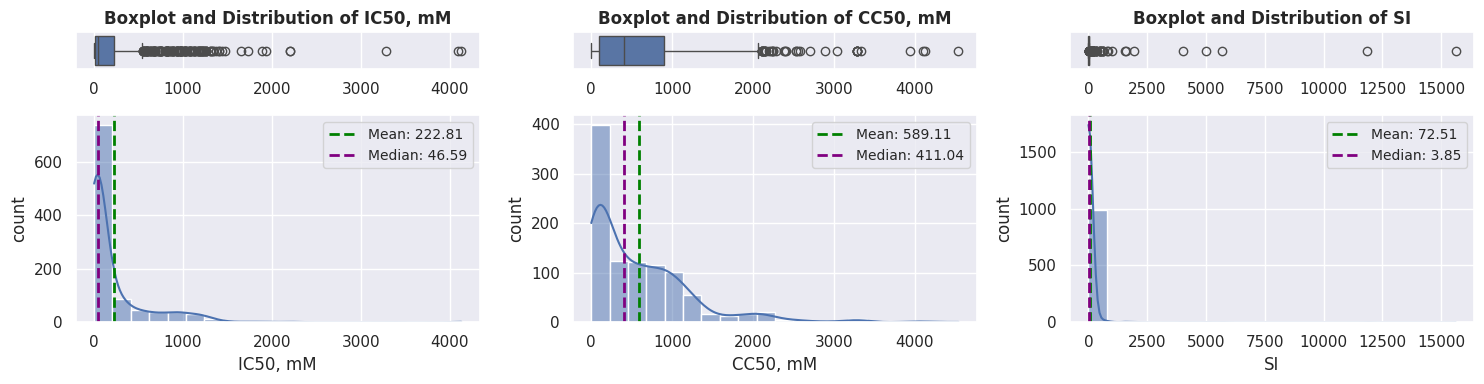

In [ ]:
# колонки с целевыми переменными
columns = ["IC50, mM", "CC50, mM", "SI"]

# создадим два подграфика ax_box и ax_hist
fig, (ax_box, ax_hist) = plt.subplots(
    2,
    3,  # две строки в сетке подграфиков
    figsize=(15, 4),
    # sharex = True, # единая шкала по оси x
    gridspec_kw={"height_ratios": (0.15, 0.85)},
)  # пропорция 15/85 по высоте

for i, col in enumerate(columns):
    sns.boxplot(x=df[col], ax=ax_box[i])
    sns.histplot(x=df[col], ax=ax_hist[i], bins=20, kde=True)

    mean_value = df[col].mean()
    median_value = df[col].median()

    ax_hist[i].axvline(
        mean_value,
        color="green",
        linestyle="dashed",
        linewidth=2,
        label=f"Mean: {mean_value:.2f}",
    )
    ax_hist[i].axvline(
        median_value,
        color="purple",
        linestyle="dashed",
        linewidth=2,
        label=f"Median: {median_value:.2f}",
    )

    ax_box[i].set_title(
        f"Boxplot and Distribution of {col}", fontsize=12, fontweight="bold"
    )
    ax_box[i].set_xlabel("")
    ax_hist[i].set_xlabel(col, fontsize=12)
    ax_hist[i].set_ylabel("count", fontsize=12)

    ax_hist[i].legend(fontsize=10)

plt.tight_layout()
plt.show()

#### 2. Логарифмируем целевые переменные

In [ ]:
import numpy as np

log_cols = {}

for col in columns:
    log_col_name = f"{col}_log"
    # Логарифмирование таргета
    log_cols[log_col_name] = np.log1p(
        df[col]
    )  # log1p = log(1 + x), чтобы избежать проблем с нулями

# Добавляем новые логарифмированные целевые переменные к датасету
df = pd.concat([df, pd.DataFrame(log_cols, index=df.index)], axis=1)

df

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM_log","CC50, mM_log",SI_log
0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,...,0,0,0,0,0,3,0,1.979535,5.173221,3.371597
1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,...,0,0,0,0,0,3,0,0.572014,1.856738,2.079442
2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,446.808,...,0,0,0,0,0,3,0,5.415250,5.088474,0.542324
3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,398.679,...,0,0,0,0,0,4,0,0.995333,4.690023,4.162553
4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,466.713,...,0,0,0,0,0,0,0,4.683348,4.943576,0.832909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,31.000104,34.999650,1.129017,12.934891,12.934891,0.048029,-0.476142,0.382752,49.133333,414.542,...,0,0,0,0,0,0,0,3.465739,3.583509,0.755660
997,31.999934,33.999415,1.062484,13.635345,13.635345,0.030329,-0.699355,0.369425,44.542857,485.621,...,0,0,0,0,0,0,0,3.496506,3.555331,0.723911
998,30.999883,33.999458,1.096761,13.991690,13.991690,0.026535,-0.650790,0.284923,41.973684,545.742,...,0,0,0,0,0,0,0,3.465732,3.555333,0.740394
999,31.998959,32.999644,1.031272,13.830180,13.830180,0.146522,-1.408652,0.381559,39.000000,522.635,...,0,0,0,0,0,0,0,3.496476,3.526350,0.708662


Посмотрим, как изменилось распределение целевых переменных IC50, CC50 и SI после логарифмирования

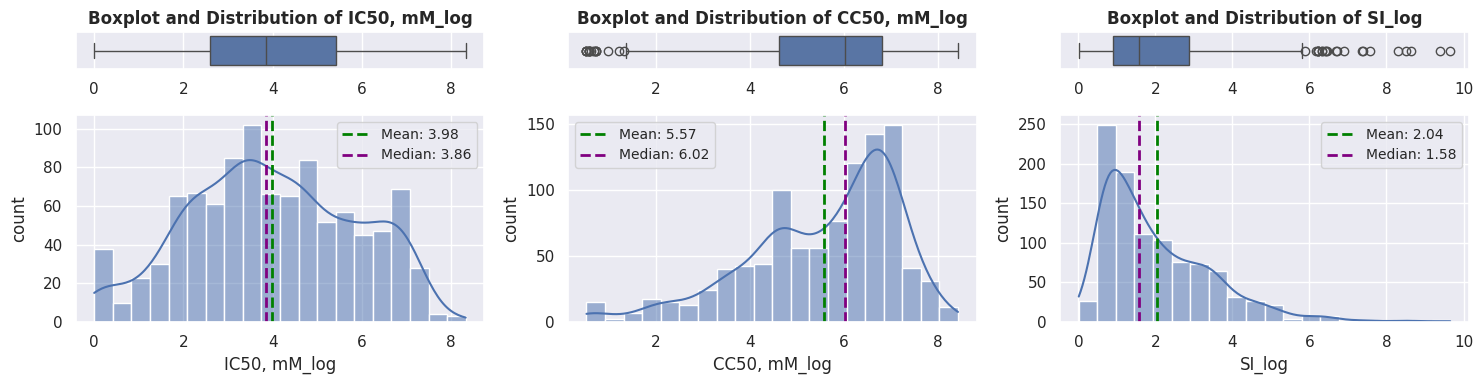

In [ ]:
# колонки с логарифмированными целевыми переменными
columns = ["IC50, mM_log", "CC50, mM_log", "SI_log"]

# создадим два подграфика ax_box и ax_hist
fig, (ax_box, ax_hist) = plt.subplots(
    2,
    3,  # две строки в сетке подграфиков
    figsize=(15, 4),
    # sharex = True, # единая шкала по оси x
    gridspec_kw={"height_ratios": (0.15, 0.85)},
)  # пропорция 15/85 по высоте

for i, col in enumerate(columns):
    sns.boxplot(x=df[col], ax=ax_box[i])
    sns.histplot(x=df[col], ax=ax_hist[i], bins=20, kde=True)

    mean_value = df[col].mean()
    median_value = df[col].median()

    ax_hist[i].axvline(
        mean_value,
        color="green",
        linestyle="dashed",
        linewidth=2,
        label=f"Mean: {mean_value:.2f}",
    )
    ax_hist[i].axvline(
        median_value,
        color="purple",
        linestyle="dashed",
        linewidth=2,
        label=f"Median: {median_value:.2f}",
    )

    ax_box[i].set_title(
        f"Boxplot and Distribution of {col}", fontsize=12, fontweight="bold"
    )
    ax_box[i].set_xlabel("")
    ax_hist[i].set_xlabel(col, fontsize=12)
    ax_hist[i].set_ylabel("count", fontsize=12)

    ax_hist[i].legend(fontsize=10)

plt.tight_layout()
plt.show()

Вывод: после логарифмирования распределение целевых переменных стало ближе к нормальному. Особенно хорошие результаты логарифмирование показало для переменной IC50.

#### 3. Определим 5 наиболее значимых признаков для каждой целевой переменной. Посмотрим распределение наиболее значимых признаков

In [ ]:
# выделяем вектор признаков и вектор целевой переменной
X = df.drop(
    columns=["IC50, mM", "CC50, mM", "SI", "IC50, mM_log", "CC50, mM_log", "SI_log"]
)
columns = ["IC50, mM_log", "CC50, mM_log", "SI_log"]

In [ ]:
from sklearn.feature_selection import mutual_info_regression, SelectKBest

# Оставим только 5 лучших признаков
selector = SelectKBest(mutual_info_regression, k=5)

best_features = {}
best_features_lst = []

for col in columns:
    selector.fit(X, df[col])
    best_features[col] = X.columns[selector.get_support(indices=True)].to_list()

    best_features_lst += X.columns[selector.get_support(indices=True)].to_list()

best_features = pd.DataFrame(best_features)
best_features

,"IC50, mM_log","CC50, mM_log",SI_log
0,MolWt,MolWt,MaxAbsPartialCharge
1,ExactMolWt,HeavyAtomMolWt,BCUT2D_CHGLO
2,MinAbsPartialCharge,ExactMolWt,BCUT2D_LOGPHI
3,Chi0,Chi0,BCUT2D_LOGPLOW
4,Kappa1,LabuteASA,SMR_VSA4


In [ ]:
best_features_lst = list(set(best_features_lst))
best_features_lst

['MinAbsPartialCharge',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'SMR_VSA4',
 'Chi0',
 'Kappa1',
 'MaxAbsPartialCharge',
 'BCUT2D_LOGPHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPLOW',
 'LabuteASA',
 'MolWt']

Посмотрим распределение наиболее значимых признаков

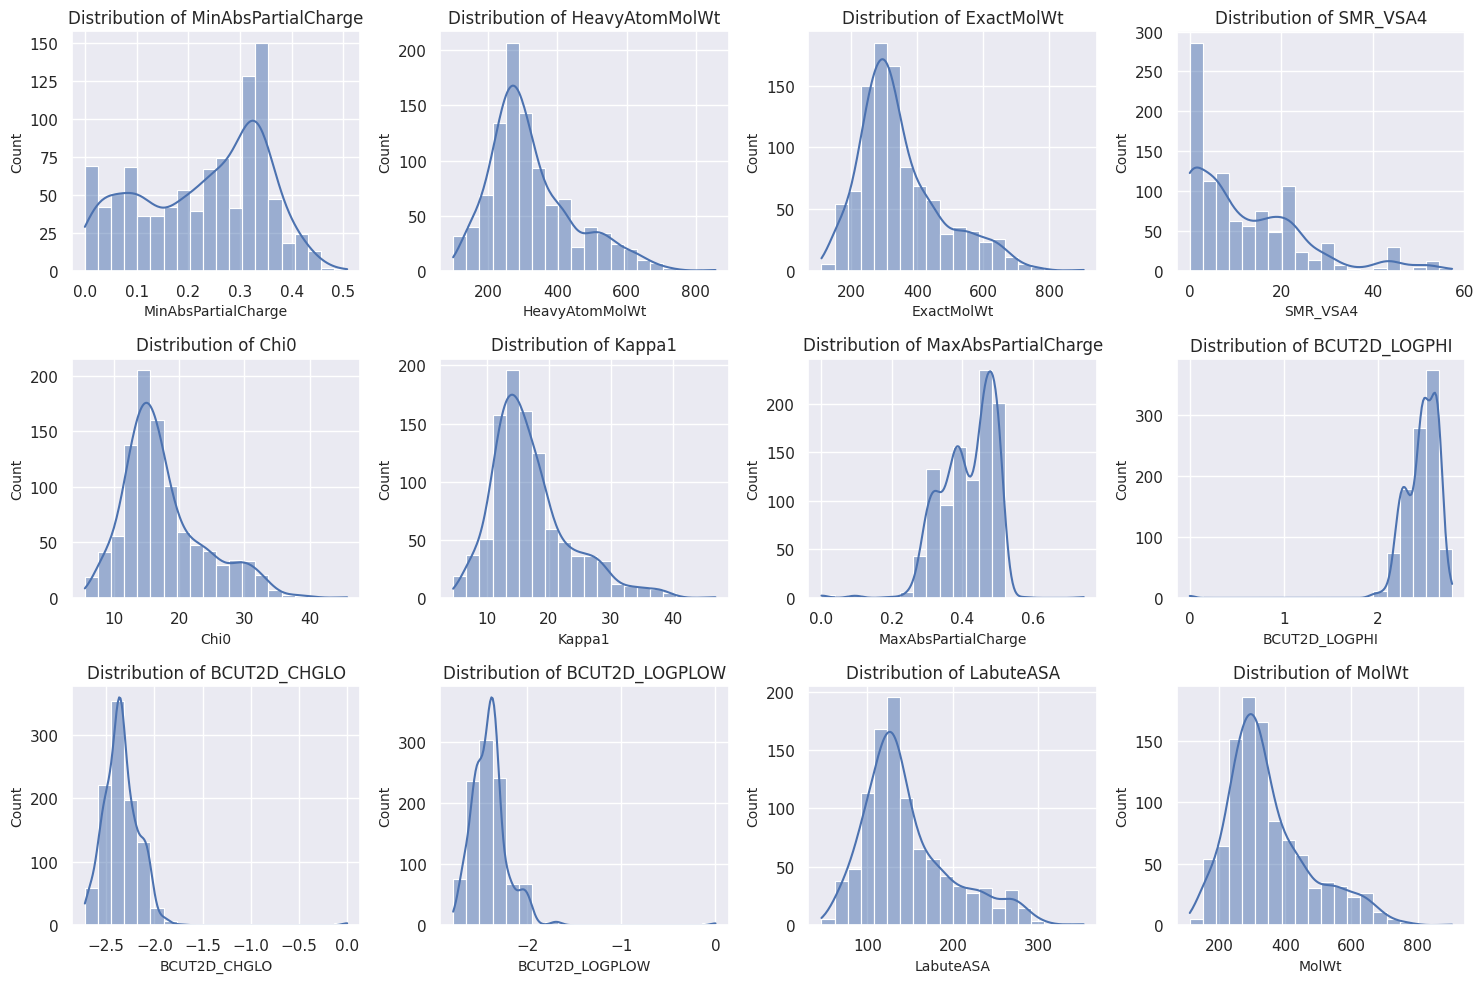

In [ ]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(best_features_lst):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[col], bins=20, kde=True)

    plt.title(f"Distribution of {col}", fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Count", fontsize=10)

plt.tight_layout()
plt.show()

#### 4. Проведем нормализацию признаков с помощью MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
X_scaled

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.203662,0.203662,0.281677,0.881996,0.403059,0.658956,0.345443,0.317623,0.345361,0.376623,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.0
1,0.120448,0.120448,0.388360,0.899521,0.453877,0.703901,0.350517,0.317623,0.350437,0.389610,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.0
2,0.022420,0.022420,0.395171,0.900640,0.226829,0.644384,0.423664,0.381147,0.423566,0.467532,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.0
3,0.203902,0.203902,0.284134,0.882400,0.358544,0.637985,0.363095,0.333504,0.363009,0.396104,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.20,0.0
4,0.207807,0.207807,0.196742,0.868043,0.416213,0.532830,0.448713,0.428790,0.448593,0.461039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.779703,0.779703,0.034912,0.778814,0.364071,0.780962,0.383058,0.370472,0.382998,0.396104,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
997,0.831164,0.831164,0.022036,0.752137,0.349058,0.690698,0.472508,0.457788,0.472446,0.487013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
998,0.857343,0.857343,0.019276,0.757941,0.253866,0.640180,0.548168,0.531949,0.548000,0.545455,...,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
999,0.845478,0.845478,0.106566,0.667368,0.362728,0.581707,0.519089,0.502730,0.519041,0.538961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0


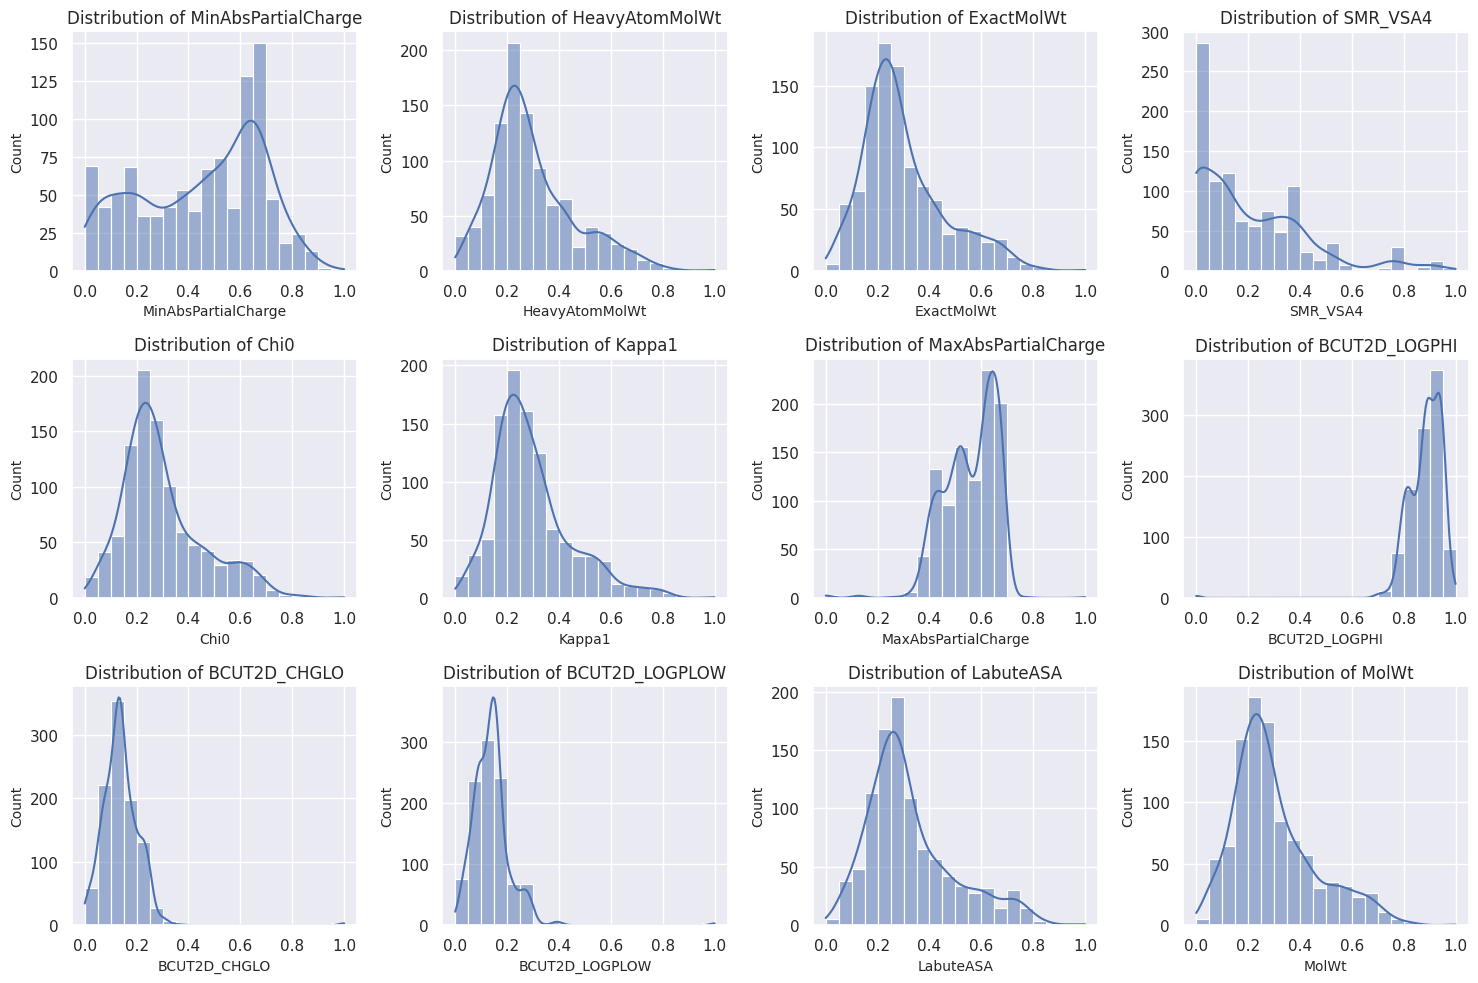

In [ ]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(best_features_lst):
    plt.subplot(3, 4, i + 1)
    sns.histplot(X_scaled[col], bins=20, kde=True)

    plt.title(f"Distribution of {col}", fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Count", fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
df = pd.concat(
    [
        df[["IC50, mM", "CC50, mM", "SI", "IC50, mM_log", "CC50, mM_log", "SI_log"]],
        X_scaled,
    ],
    axis=1,
)

In [ ]:
df

,"IC50, mM","CC50, mM",SI,"IC50, mM_log","CC50, mM_log",SI_log,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.239374,175.482382,28.125000,1.979535,5.173221,3.371597,0.203662,0.203662,0.281677,0.881996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.0
1,0.771831,5.402819,7.000000,0.572014,1.856738,2.079442,0.120448,0.120448,0.388360,0.899521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.0
2,223.808778,161.142320,0.720000,5.415250,5.088474,0.542324,0.022420,0.022420,0.395171,0.900640,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.0
3,1.705624,107.855654,63.235294,0.995333,4.690023,4.162553,0.203902,0.203902,0.284134,0.882400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.20,0.0
4,107.131532,139.270991,1.300000,4.683348,4.943576,0.832909,0.207807,0.207807,0.196742,0.868043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,31.000104,34.999650,1.129017,3.465739,3.583509,0.755660,0.779703,0.779703,0.034912,0.778814,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
997,31.999934,33.999415,1.062484,3.496506,3.555331,0.723911,0.831164,0.831164,0.022036,0.752137,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
998,30.999883,33.999458,1.096761,3.465732,3.555333,0.740394,0.857343,0.857343,0.019276,0.757941,...,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
999,31.998959,32.999644,1.031272,3.496476,3.526350,0.708662,0.845478,0.845478,0.106566,0.667368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0


## Корреляционный анализ и отбор признаков

#### 1. Посмотрим, насколько сильно признаки коррелируют с целевыми переменными

Посмотрим количество признаков, у которых коэффициент корреляции с целевыми переменными более 0.2

In [ ]:
df_IC50 = (
    df.drop(columns=["IC50, mM", "CC50, mM", "SI"]).corr().loc[:, "IC50, mM_log"].abs()
)

# выведем признаки, у которых коэффициент корреляции с целевой переменной более 0.2
df_IC50[(df_IC50 >= 0.2) & (df_IC50 != 1.0)]

,"IC50, mM_log"
"CC50, mM_log",0.624289
SI_log,0.649806
PEOE_VSA7,0.201324
SMR_VSA5,0.205296
SlogP_VSA5,0.238441
VSA_EState4,0.258912
NumAliphaticCarbocycles,0.213213
NumAliphaticHeterocycles,0.225604
NumSaturatedHeterocycles,0.272508
fr_NH2,0.257880


In [ ]:
df_CC50 = (
    df.drop(columns=["IC50, mM", "CC50, mM", "SI"]).corr().loc[:, "CC50, mM_log"].abs()
)

# выведем признаки, у которых коэффициент корреляции с целевой переменной более 0.2
df_CC50[(df_CC50 >= 0.2) & (df_CC50 != 1.0)]

,"CC50, mM_log"
"IC50, mM_log",0.624289
Kappa2,0.207330
Kappa3,0.251795
PEOE_VSA7,0.216066
EState_VSA2,0.205663
fr_NH2,0.226112
fr_allylic_oxid,0.229358


In [ ]:
df_SI = df.drop(columns=["IC50, mM", "CC50, mM", "SI"]).corr().loc[:, "SI_log"].abs()

# выведем признаки, у которых коэффициент корреляции с целевой переменной более 0.2
df_SI[(df_SI >= 0.2) & (df_SI != 1.0)]

,SI_log
"IC50, mM_log",0.649806
SMR_VSA7,0.219979
SlogP_VSA6,0.205386
FractionCSP3,0.222259
NumAliphaticHeterocycles,0.203656


Вывод: анализ корреляции признаков с целевыми переменными показал, что признаки имеют слабую линейную зависимость с целевыми переменными, всего 4-8 признаков имеют коэффициент корреляции от 0.2 до 0.3 (не учитываем взаимную корреляцию целевых переменных).

#### 2. Посмотрим, насколько сильно признаки коррелируют между собой

<Axes: >

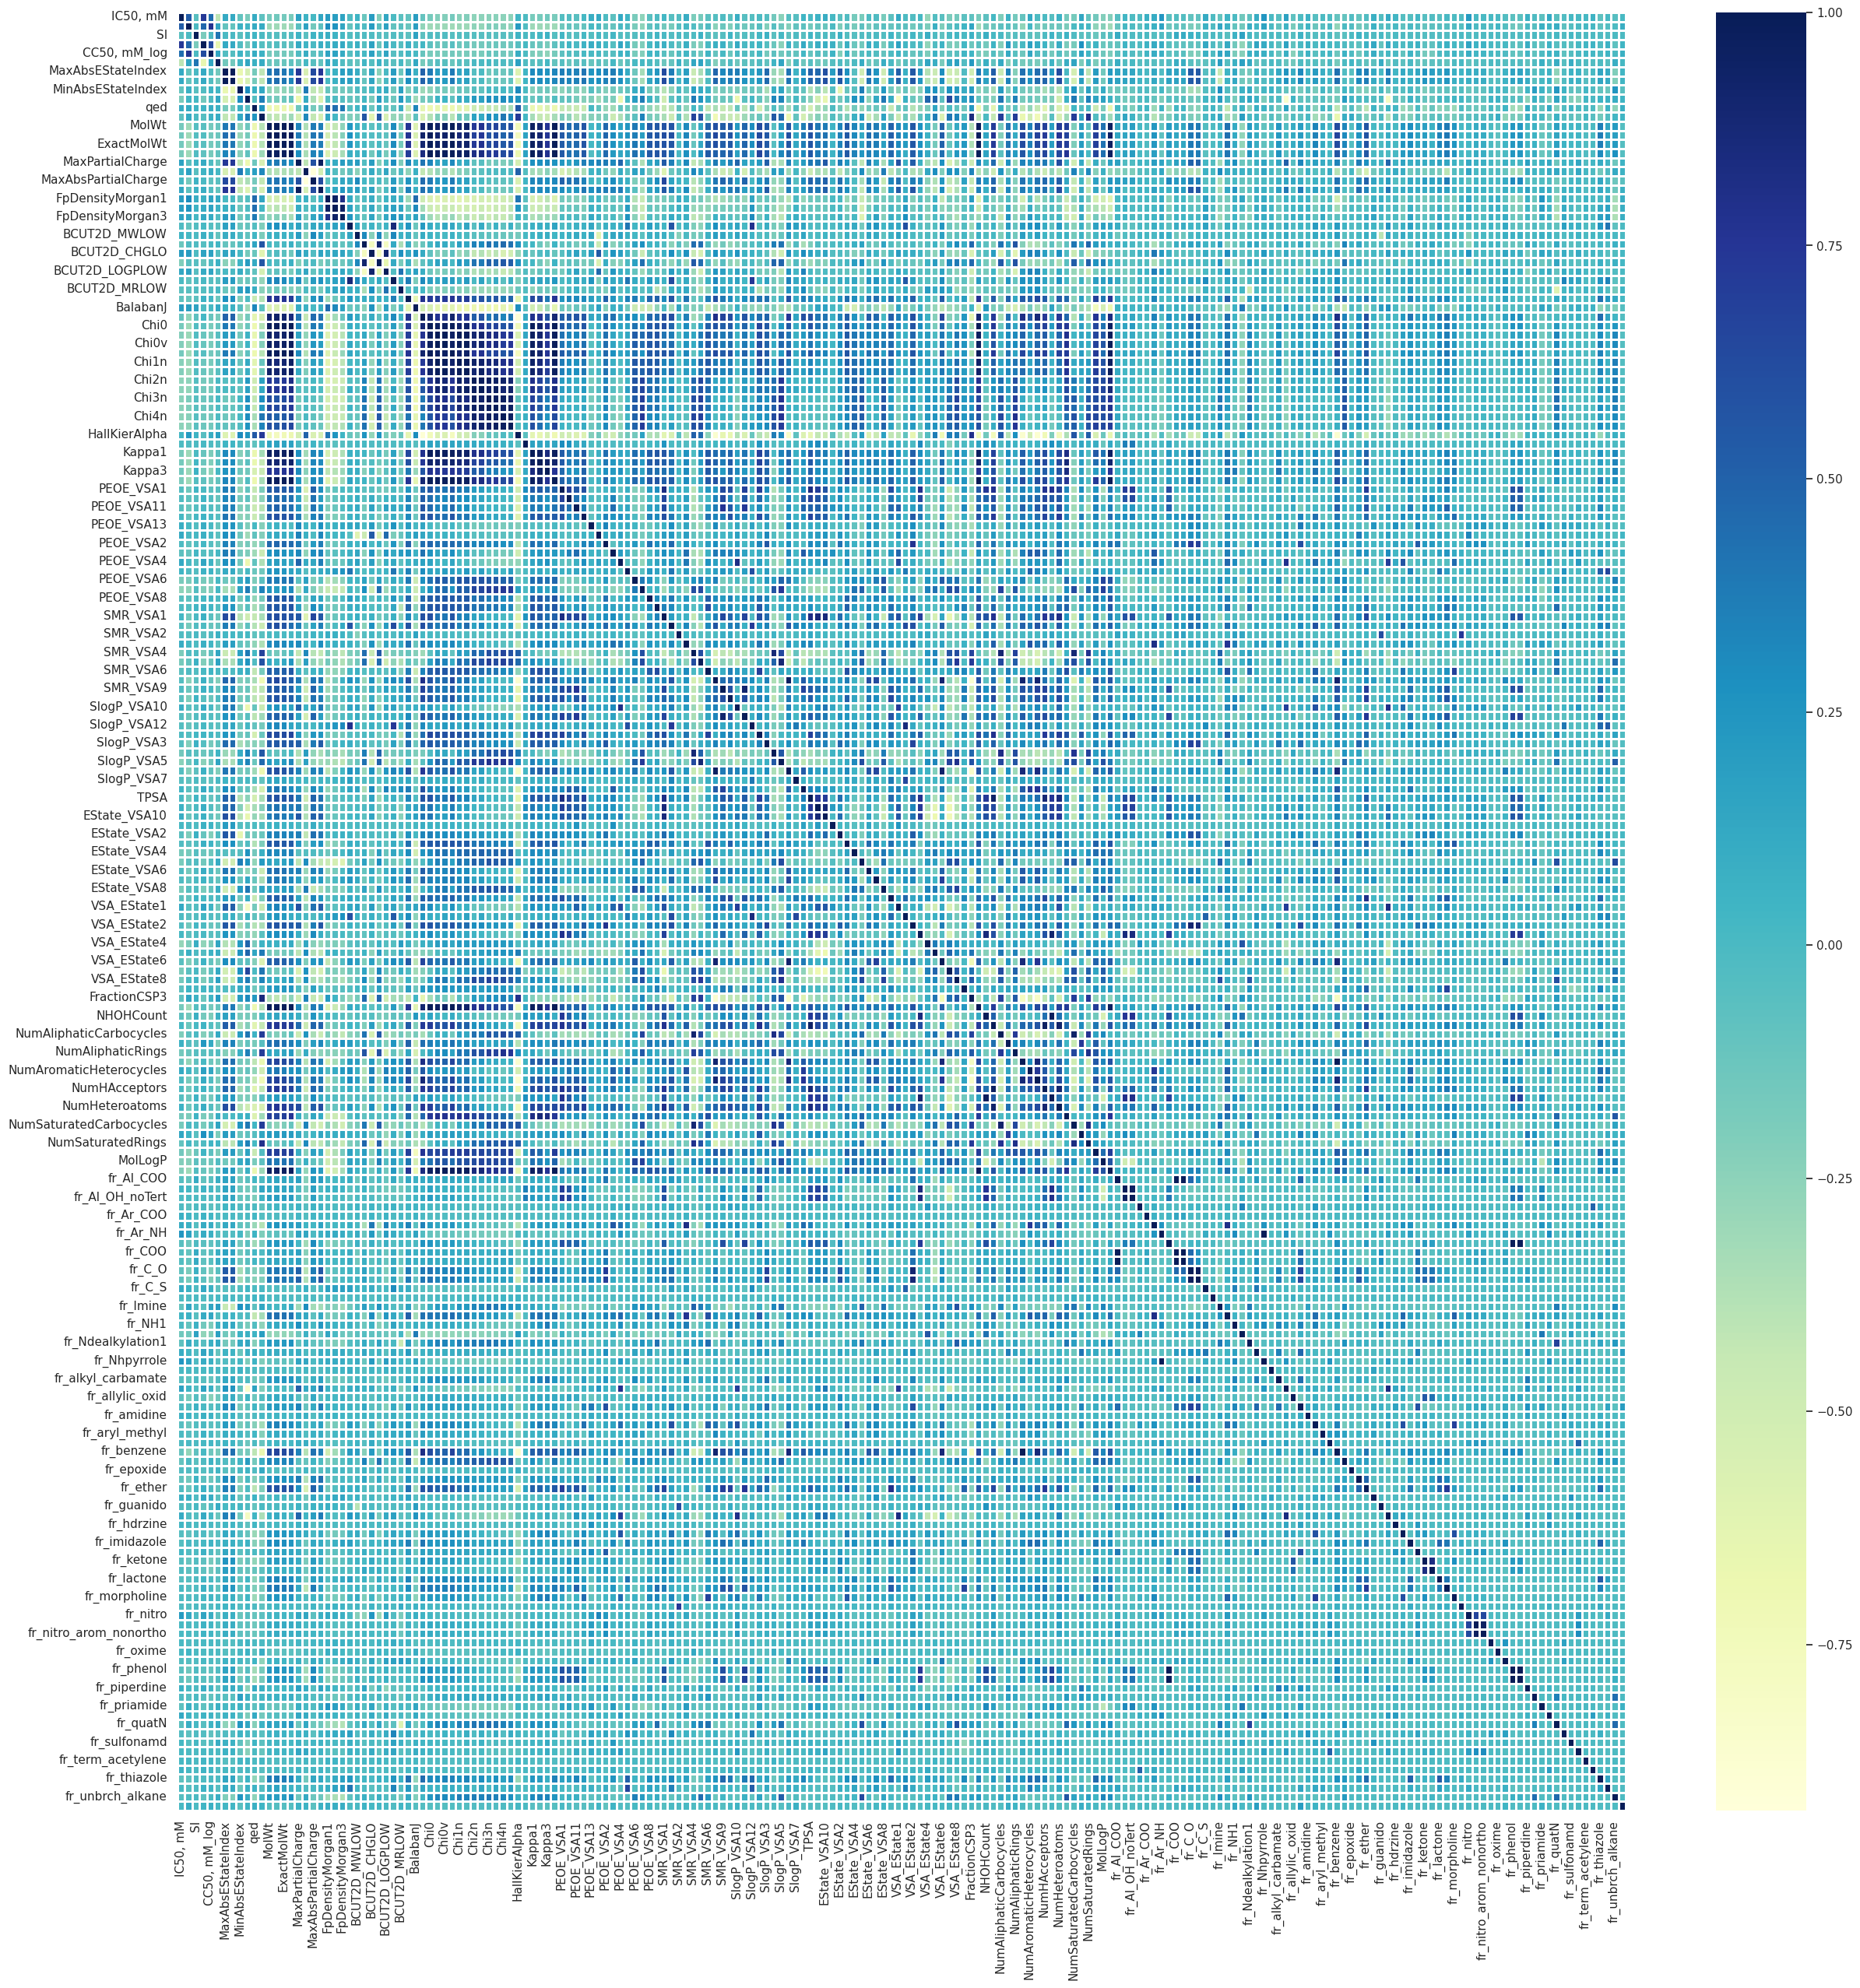

In [ ]:
sns.set(rc={"figure.figsize": (30, 30)})

# cmap - название цветовой карты
# linecolor - цвет линий, которые делят каждую ячейку
# linewidths - ширина линий, которые делят каждую ячейку
sns.heatmap(df.corr(), cmap="YlGnBu", linecolor="white", linewidths=1)

Вывод: матрица корреляции показывает сильную корреляцию между собой признаков Chi, Kappa, PEOE_VSA, SMR_VSA, SlogP_VSA, EState_VSA, VSA_EState. Целесообразно сократить признаковое пространство, объединив признаки в группы, что также позволит исключить сильную зависимость признаков.

#### 3. Сократим признаковое пространство, объединив признаки в группы

In [ ]:
# сохраним в переменные названия колонок, которые будем объединять
chi_cols = [col for col in df.columns if col.startswith("Chi")]
kappa_cols = [col for col in df.columns if col.startswith("Kappa")]
PEOE_VSA_cols = [col for col in df.columns if col.startswith("PEOE_VSA")]
SMR_VSA_cols = [col for col in df.columns if col.startswith("SMR_VSA")]
SlogP_VSA_cols = [col for col in df.columns if col.startswith("SlogP_VSA")]
EState_VSA_cols = [col for col in df.columns if col.startswith("EState_VSA")]
VSA_EState_cols = [col for col in df.columns if col.startswith("VSA_EState")]

# создадим новые признаки, просуммировав значения из объединяемых колонок
df["Chi"] = df[chi_cols].sum(axis=1)
df["Kappa"] = df[kappa_cols].sum(axis=1)
df["PEOE_VSA"] = df[PEOE_VSA_cols].sum(axis=1)
df["SMR_VSA"] = df[SMR_VSA_cols].sum(axis=1)
df["SlogP_VSA"] = df[SlogP_VSA_cols].sum(axis=1)
df["EState_VSA"] = df[EState_VSA_cols].sum(axis=1)
df["VSA_EState"] = df[VSA_EState_cols].sum(axis=1)

# удалим старые колонки
cols_to_drop = (
    chi_cols
    + kappa_cols
    + PEOE_VSA_cols
    + SMR_VSA_cols
    + SlogP_VSA_cols
    + EState_VSA_cols
    + VSA_EState_cols
)
df.drop(columns=cols_to_drop, inplace=True)

In [ ]:
df

,"IC50, mM","CC50, mM",SI,"IC50, mM_log","CC50, mM_log",SI_log,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,...,fr_thiophene,fr_unbrch_alkane,fr_urea,Chi,Kappa,PEOE_VSA,SMR_VSA,SlogP_VSA,EState_VSA,VSA_EState
0,6.239374,175.482382,28.125000,1.979535,5.173221,3.371597,0.203662,0.203662,0.281677,0.881996,...,0.0,0.15,0.0,6.244950,0.872278,1.849596,1.656534,1.409310,1.363038,3.212521
1,0.771831,5.402819,7.000000,0.572014,1.856738,2.079442,0.120448,0.120448,0.388360,0.899521,...,0.0,0.15,0.0,6.601003,0.914682,1.350636,1.564823,1.654294,1.111547,3.036357
2,223.808778,161.142320,0.720000,5.415250,5.088474,0.542324,0.022420,0.022420,0.395171,0.900640,...,0.0,0.15,0.0,8.046121,1.065814,2.125484,1.729382,1.507932,1.261023,3.605910
3,1.705624,107.855654,63.235294,0.995333,4.690023,4.162553,0.203902,0.203902,0.284134,0.882400,...,0.0,0.20,0.0,6.474522,0.955535,1.899410,1.693357,1.444191,1.386790,3.236238
4,107.131532,139.270991,1.300000,4.683348,4.943576,0.832909,0.207807,0.207807,0.196742,0.868043,...,0.0,0.00,0.0,7.283966,1.008745,2.041540,2.036026,2.085103,1.578446,3.844661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,31.000104,34.999650,1.129017,3.465739,3.583509,0.755660,0.779703,0.779703,0.034912,0.778814,...,0.0,0.00,0.0,6.341904,0.771707,1.858068,1.899974,2.107205,1.926522,3.177215
997,31.999934,33.999415,1.062484,3.496506,3.555331,0.723911,0.831164,0.831164,0.022036,0.752137,...,0.0,0.00,0.0,7.167030,1.037718,2.343830,2.191027,2.471311,2.163199,3.334032
998,30.999883,33.999458,1.096761,3.465732,3.555333,0.740394,0.857343,0.857343,0.019276,0.757941,...,0.0,0.00,0.0,7.909882,1.261307,2.678913,2.474751,2.781308,2.369348,3.486369
999,31.998959,32.999644,1.031272,3.496476,3.526350,0.708662,0.845478,0.845478,0.106566,0.667368,...,0.0,0.00,0.0,7.060575,1.358744,2.691922,2.348154,2.608160,2.111231,3.344150


In [ ]:
df.loc[0:3, "MolMR":]

,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,...,fr_thiophene,fr_unbrch_alkane,fr_urea,Chi,Kappa,PEOE_VSA,SMR_VSA,SlogP_VSA,EState_VSA,VSA_EState
0,0.448882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.15,0.0,6.244950,0.872278,1.849596,1.656534,1.409310,1.363038,3.212521
1,0.443970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.15,0.0,6.601003,0.914682,1.350636,1.564823,1.654294,1.111547,3.036357
2,0.530177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.15,0.0,8.046121,1.065814,2.125484,1.729382,1.507932,1.261023,3.605910
3,0.471062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.20,0.0,6.474522,0.955535,1.899410,1.693357,1.444191,1.386790,3.236238


<Axes: >

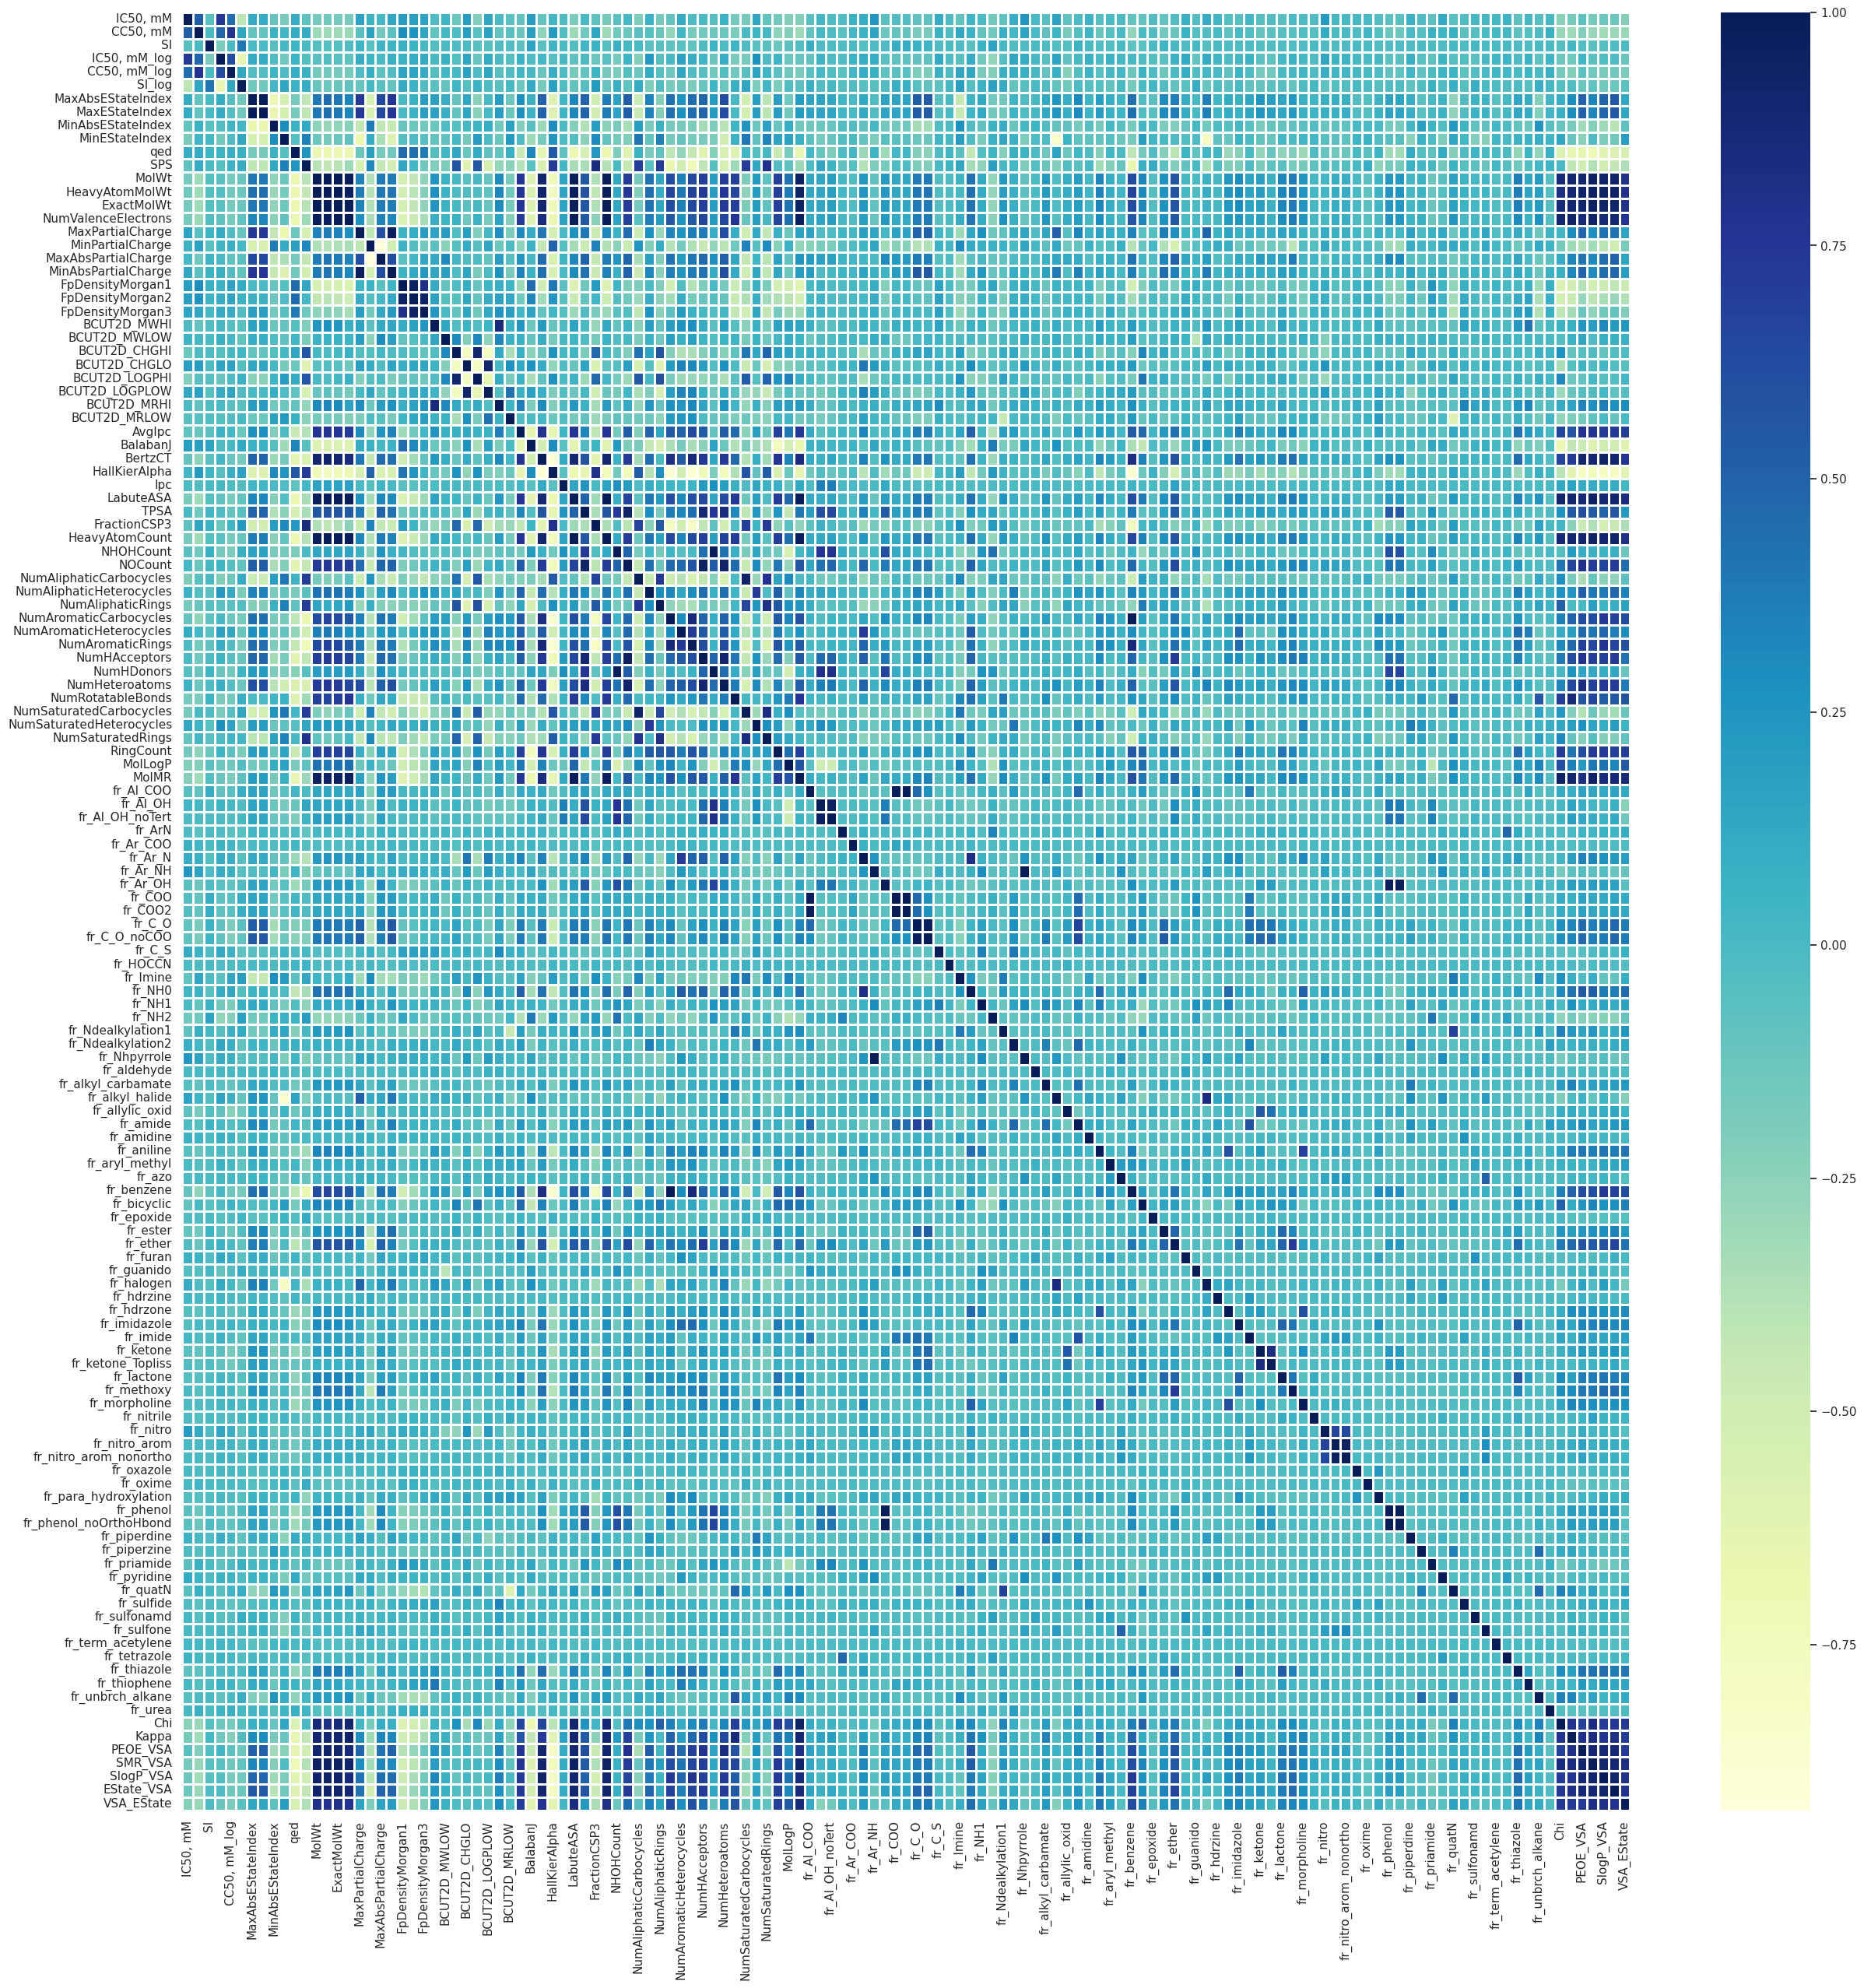

In [ ]:
sns.set(rc={"figure.figsize": (30, 30)})

# cmap - название цветовой карты
# linecolor - цвет линий, которые делят каждую ячейку
# linewidths - ширина линий, которые делят каждую ячейку
sns.heatmap(df.corr(), cmap="YlGnBu", linecolor="white", linewidths=1)

## Сохраняем обработанный файл

In [ ]:
df.to_excel(
    "/content/drive/MyDrive/Colab Notebooks/8 Классическое МО (ML)/Курсовая работа Хим соединения/df.xlsx",
    index=False,
)